<a href="https://colab.research.google.com/github/tcmarino8/Cyplan-88/blob/ASSINGMENT_2/Tyler_Marino_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files

accquaintances = files.upload()
random = files.upload()

Saving c88-2023_links_acquaintances - Sheet1.csv to c88-2023_links_acquaintances - Sheet1.csv


Saving c88-2023_links_random - Sheet1.csv to c88-2023_links_random - Sheet1.csv


In [3]:
acquaintances_table = pd.read_csv('c88-2023_links_acquaintances - Sheet1.csv')
random_table = pd.read_csv('c88-2023_links_random - Sheet1.csv')

In [4]:
acquaintances_table.head(5)

,source,target
0,48,14
1,48,49
2,2,32
3,28,27
4,10,46


In [5]:
random_table.head(5)

,source,target
0,19,23
1,19,44
2,19,34
3,19,12
4,13,27


In [6]:
print('there are ', len(np.unique(acquaintances_table['source'])), 'unique ids in the source acquaintance table, and there are', len(np.unique(acquaintances_table['target'])), 'unique ids in the targets')

there are  33 unique ids in the source acquaintance table, and there are 41 unique ids in the targets


In [7]:
print('there are ', len(np.unique(random_table['source'])), 'unique ids in the source acquaintance table, and there are', len(np.unique(random_table['target'])), 'unique ids in the targets')

there are  45 unique ids in the source acquaintance table, and there are 58 unique ids in the targets


In [8]:
random_graph = nx.Graph()
for i in range(len(random_table['source'])):
  random_graph.add_edge(random_table['source'].values[i], random_table['target'].values[i])

GreatesConnectedComp = sorted(nx.connected_components(random_graph), key=len, reverse = True)
#random_graph_gcc = 
random_graph = random_graph.subgraph(GreatesConnectedComp[0])

In [9]:
acquaintance_graph = nx.Graph()
for i in range(len(acquaintances_table['source'])):
  acquaintance_graph.add_edge(acquaintances_table['source'].values[i], acquaintances_table['target'].values[i])

GreatesConnectedComp = sorted(nx.connected_components(acquaintance_graph), key=len, reverse = True)
#random_graph_gcc = 
print(len(GreatesConnectedComp[1]))
acquaintance_graph = acquaintance_graph.subgraph(GreatesConnectedComp[0])

2


##Basic Network Analysis 1

In [28]:
print('Question 1, Basic Network analysis')




print('there are', nx.number_of_nodes(random_graph), 'nodes in the random graph. There are', nx.number_of_edges(random_graph), 'links')
print('there are', nx.number_of_nodes(acquaintance_graph), 'nodes in the acquaintance graph. There are', nx.number_of_edges(acquaintance_graph), 'links')

Question 1, Basic Network analysis
there are 60 nodes in the random graph. There are 174 links
there are 41 nodes in the acquaintance graph. There are 63 links


In [30]:
degree_dict_rand = {}
for node in random_graph.nodes:
  degree_dict_rand[node] = random_graph.degree(node)

degree_dict_acq = {}
for node in acquaintance_graph.nodes:
  degree_dict_acq[node] = acquaintance_graph.degree(node)
max_deg_random = max(degree_dict_rand.values())
max_deg_acq = max(degree_dict_acq.values())

maxdeg_node_rand = degree_dict_rand.get(max_deg_random)
maxdeg_node_acq = degree_dict_acq.get(max_deg_acq)

4


##Basic Network Analysis 2

In [33]:
print('Question 2, Basic Network analysis')




print(maxdeg_node_rand, 'has the max degree of', max_deg_random, 'of the random graph')
print(degree_dict_acq.get(max_deg_acq), 'has the max degree of', max_deg_acq, 'of the acquaintance graph')

Question 2, Basic Network analysis
7 has the max degree of 13 of the random graph
4 has the max degree of 10 of the acquaintance graph


In [13]:
#Creating the tables.
table_rand = pd.DataFrame()
table_rand['Network'] = ['ClassNetwork_Random', 'Random Graph Model (p=__,N=__)', 'Small World Model (p,k,n)(p=__,N=___,k=___)', 'Barabasi Albert Model (N=___,Kmin=____)']

In [14]:
table_rand['Average Clustering Coeff'] = np.zeros(4)
table_rand['Average Degrees'] = np.zeros(4)
table_rand['Average Shortest Path'] = np.zeros(4)
table_rand['Num Nodes'] = np.zeros(4)
table_rand['Num Links'] = np.zeros(4)

In [15]:
table_acq = pd.DataFrame()
table_acq['Network'] = ['ClassNetwork_Acq', 'Random Graph Model (p=__,N=__)', 'Small World Model (p,k,n)(p=__,N=___,k=___)', 'Barabasi Albert Model (N=___,Kmin=____)']
table_acq['Average Clustering Coeff'] = np.zeros(4)
table_acq['Average Degrees'] = np.zeros(4)
table_acq['Average Shortest Path'] = np.zeros(4)
table_acq['Num Nodes'] = np.zeros(4)
table_acq['Num Links'] = np.zeros(4)

In [16]:
#Creating the models for the random
rand_random_model = nx.erdos_renyi_graph(60, .2)
rand_smallworld_model = nx.watts_strogatz_graph(60, 2, .01)
rand_barabasi_model = nx.barabasi_albert_graph(60, 3)

In [17]:
#calculate the first row of random graph of students from data in class
our_data_rand_CC = nx.average_clustering(random_graph)
our_data_rand_deg = np.mean(list(dict(random_graph.degree()).values()))
our_data_rand_shortpath = nx.average_shortest_path_length(random_graph)
our_data_rand_num_nodes = nx.number_of_nodes(random_graph)
our_data_rand_num_links = nx.number_of_edges(random_graph)

#This will insert all items in one row, old school style
# insert_item('Average Clustering Coeff', 0 ,our_data_rand_CC, table_rand)
# insert_item('Average Degrees', 0 ,our_data_rand_deg, table_rand)
# insert_item('Average Shortest Path', 0 ,our_data_rand_shortpath, table_rand)
# insert_item('Num Nodes', 0 ,our_data_rand_num_nodes, table_rand)
# insert_item('Num Links', 0 ,our_data_rand_num_links, table_rand)

In [18]:
#Calculating the information for a row of the table.
def calc_info(graph):
  CC = nx.average_clustering(graph)
  avg_deg = np.mean(list(dict(graph.degree()).values()))
  shortpath = nx.average_shortest_path_length(graph)
  num_nodes = nx.number_of_nodes(graph)
  num_links = nx.number_of_edges(graph)
  return [CC, avg_deg, shortpath, num_nodes, num_links]
#Insert and item in a specific row and colomn of a data frame
def insert_item(column, row, item, df):
  df.at[row, column] =  item

#insert a full row in a data frame
def insert_row(columns, row, info, df):
  input_columns = columns[1:]
  for  i, column in enumerate(input_columns):
    insert_item(column, row, info[i], df)

In [19]:
#Create a function to form the graphs:
def create_graph(type_graph, p_connect, num_nodes, p_shuffle, k, kmin):
  if type_graph == 'rand':
      return nx.erdos_renyi_graph(num_nodes, p_connect)
  elif type_graph == 'watts':
      return nx.watts_strogatz_graph(num_nodes, k, p_shuffle)
  else:
      return nx.barabasi_albert_graph(num_nodes, kmin)

#Create a function that will take in empty dataframes and create a filled in table as the one on the homework shows!!
def createNfill_table(graphs, graph_names):
  df = pd.DataFrame()
  df['Network'] = [graph_names[0], graph_names[1], graph_names[2], graph_names[3]]
  df['Average Clustering Coeff'] = np.zeros(4)
  df['Average Degrees'] = np.zeros(4)
  df['Average Shortest Path'] = np.zeros(4)
  df['Num Nodes'] = np.zeros(4)
  df['Num Links'] = np.zeros(4)
  for row_index, graph in enumerate(graphs):
    print('graph index:', row_index)
    input_info = calc_info(graph)
    columns = df.columns
    insert_row(columns, row_index, input_info, df)
  return df

#Creating all the graph names for our table, the network Row
def create_graph_names(vals, rand):
  graph_names = []
  if rand == True:
    graph_names.append('ClassNetwork_Random')
  else:
    graph_names.append('ClassNetwork_Acquaintances')
  graph_names.append(str('Random Graph Model (p=' + str(vals[0]) + ', N=' + str(vals[1]) + ')'))
  graph_names.append('Small World Model (p,k,n)(p={}, N={} ,k={})'.format(vals[2], vals[1], vals[3]))
  graph_names.append('Barabasi Albert Model (N={}, Kmin={})'.format(vals[1], vals[4]))
  return graph_names

#Creates arrays for the degree distribution of each graph
def create_hists(graph_array, graph_names):
  for i, graph in enumerate(graph_array):
    degree_arr = []
    for node in graph.nodes:
      degree_arr.append(nx.degree(graph, node))
    plt.hist(degree_arr, bins = 10, density = True)
    plt.xlabel('Degree of nodes')
    plt.ylabel('percent of nodes with degree___')
    plt.title(graph_names[i])
    plt.show()

In [26]:
#I must create the three graphs first for the random graph table
print('the average number of links:', 174*2/60)
#estimate clustering coeff for QUESTION 3
C0 = nx.average_clustering(nx.watts_strogatz_graph(60, 7, 0))

Cp = C0*(1-.1)**3
print('the C(p) value that is calculated is:', Cp)

prob_reshuffle = 1 - pow(Cp/C0, 1/3)
random_p = .10
num_nodes = 60
num_connections = 4
min_connections = 3


rand_vals = [random_p, num_nodes, prob_reshuffle, num_connections, min_connections]



random_class_graph = random_graph
random_model = create_graph('rand', *rand_vals)
small_world_model = create_graph('watts', *rand_vals)
brabasi_model = create_graph('barb', *rand_vals)


rand_graph_names = create_graph_names(rand_vals, rand=True)


rand_graphs = [random_class_graph, random_model, small_world_model, brabasi_model]

the average number of links: 5.8
the C(p) value that is calculated is: 0.4374000000000006


##Questions 1-5 for the random class network.
####Check above cell for analytical calculation of C(p)

In [27]:
createNfill_table(rand_graphs, rand_graph_names)

graph index: 0
graph index: 1
graph index: 2
graph index: 3


,Network,Average Clustering Coeff,Average Degrees,Average Shortest Path,Num Nodes,Num Links
0,ClassNetwork_Random,0.102122,5.800000,2.500000,60.0,174.0
1,"Random Graph Model (p=0.1, N=60)",0.119309,6.766667,2.310734,60.0,203.0
2,"Small World Model (p,k,n)(p=0.0999999999999999...",0.297778,4.000000,3.758757,60.0,120.0
3,"Barabasi Albert Model (N=60, Kmin=3)",0.281972,5.700000,2.357627,60.0,171.0


##Question 6 for the random class networks

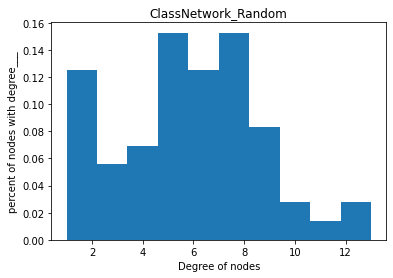

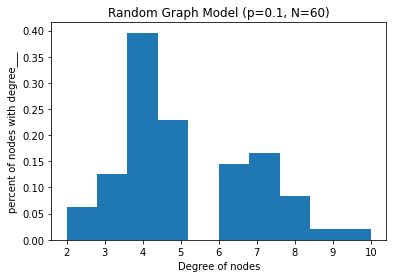

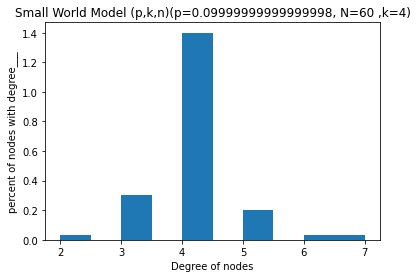

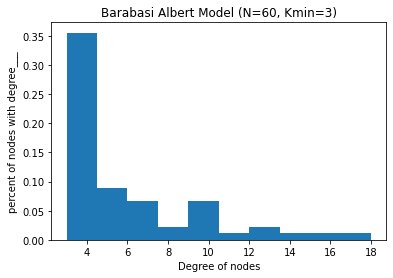

In [22]:
create_hists(rand_graphs, rand_graph_names)

In [23]:
#I must create the three graphs first for the acquaintances graph table
print('the average number of links:', 92*2/40)
#estimate clustering coeff for QUESTION 3
C0 = nx.average_clustering(nx.watts_strogatz_graph(41, 4, 0))

Cp = C0*(1-.1)**3
print('the C(p) value calculated is:', Cp)

prob_reshuffle = 1 - pow(Cp/C0, 1/3)
random_p = .1
num_nodes = 40
num_connections = 4
min_connections = 3


rand_vals = [random_p, num_nodes, prob_reshuffle, num_connections, min_connections]



acquaintance_class_graph = acquaintance_graph
random_model = create_graph('rand', *rand_vals)
small_world_model = create_graph('watts', *rand_vals)
#GreatesConnectedComp = sorted(nx.connected_components(small_world_model), key=len, reverse = True)
#small_world_model = nx.subgraph(small_world_model, GreatesConnectedComp[0])
brabasi_model = create_graph('barb', *rand_vals)


acq_graph_names = create_graph_names(rand_vals, rand=False)


acq_graphs = [acquaintance_class_graph, random_model, small_world_model, brabasi_model]

the average number of links: 4.6
the C(p) value calculated is: 0.36450000000000005


##Question 1-5 for the acquaintances class network

####See above cell for analytical C(p) *solution*

In [24]:
createNfill_table(acq_graphs, acq_graph_names)

graph index: 0
graph index: 1
graph index: 2
graph index: 3


,Network,Average Clustering Coeff,Average Degrees,Average Shortest Path,Num Nodes,Num Links
0,ClassNetwork_Acquaintances,0.308014,3.073171,3.758537,41.0,63.0
1,"Random Graph Model (p=0.1, N=40)",0.071567,4.550000,2.482051,40.0,91.0
2,"Small World Model (p,k,n)(p=0.0999999999999999...",0.333333,4.000000,3.342308,40.0,80.0
3,"Barabasi Albert Model (N=40, Kmin=3)",0.223089,5.550000,2.184615,40.0,111.0


##Question 6 for the acquaintances class network

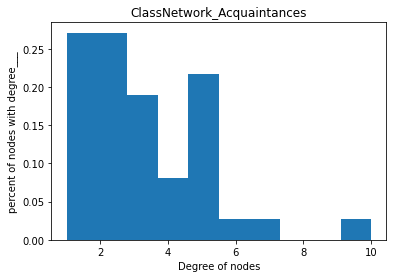

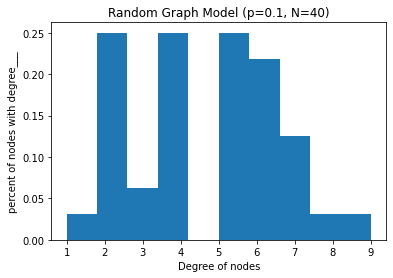

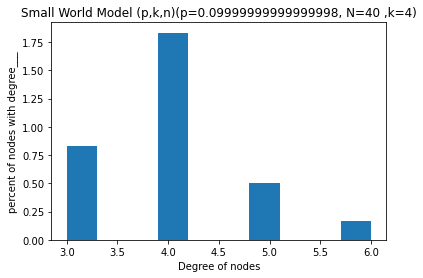

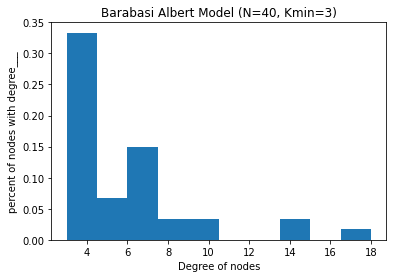

In [25]:
create_hists(acq_graphs, acq_graph_names)

##Question 7 and 8:

7)
Lets look at the random class network that we created first. By name and practice, we should get a fairly random network. Indeed we see this to be true, Both the clustering coefficient and the average shortest path are nearly identical for the random model that we created, and the average degree is not far off. The other models are fairly far off, close to 2X the clustering coefficient and 1.5X higer average shortest path. The histograms are harder to infer things since we don't have many nodes to go off of. However we can see a sort of resemblance between the random model and our class sample. 
Then we look at the acquaintances graph. the numbers in the small world model match most closely with the key attributes of Clustering Coeff and average shortest path. The number of links is a little higher, but this is as we expected because we are looking at a "social network" which is as good of an example of a small world network as we can get. Once again the histograms are hard to conclude info from.

8) The second empirical network has the small world network property because it has us identifying who we know. Mostly neighborhoods will be tight with here and there a person will connect with another person from outside the neighborhood. This will allow for smaller shortest distance. Social networks, such as the one we created, are great examples of small world networks. Everyone is connected to everyone else somehow(within 6 links)!